In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import PercentFormatter
import matplotlib

In [75]:
plt.style.use('seaborn-v0_8')

# Matplotlib setup
plt.rcParams["savefig.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = "cmr10"
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["axes.unicode_minus"] = False
matplotlib.rcParams["font.size"] = "10"


In [4]:
comparison_list = [5, 10, 20, 50]
scm_noise_list = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
eval_noise_list = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]

x_results = np.load("results/simpleSCM_comparison_results.npy")

# x_results = np.zeros((len(scm_noise_list), len(eval_noise_list), len(comparison_list)))

# for i, scm_noise in enumerate(scm_noise_list):
#     for j, eval_noise in enumerate(eval_noise_list):
#         for k, n_comparisons in enumerate(comparison_list):
#             x_results[i, j, k] =  (((60-n_comparisons) * (1 + scm_noise + eval_noise))/100)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

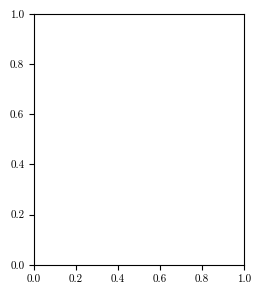

In [5]:
# Sample data
#x_results = np.random.randn(7,7,4)

n_comparisons = [5, 10, 20, 50]

# Determine global minimum and maximum values for consistent colormap
global_vmin = np.min(x_results)
global_vmax = np.max(x_results)

# Set up the figure and gridspec
fig = plt.figure(figsize=(6.3,7.5))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1])

# Add space between rows
gs.update(hspace=0.3)  # Adjust this value to increase/decrease space


ticks = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
tick_locations = np.arange(0.5, 7.5)  # Centering the ticks
titles = ["Title 1", "Title 2", "Title 3", "Title 4"]

for i in range(2):
    for j in range(2):
        ax = plt.subplot(gs[i, j])
        sns.heatmap(x_results[:,:,i*2 + j], annot=True, fmt='.0%', cmap='inferno_r', cbar=False, ax=ax, vmin=global_vmin, vmax=global_vmax)
        ax.set_title(f"{n_comparisons[i*2 + j]} comparisons", fontsize=12)
        ax.set_xlabel('SCM Noise (Std Dev)')
        if j == 0:  # Only set y-label for the leftmost heatmaps
            ax.set_ylabel('Evaluation Noise (Std Dev)')
        ax.set_xticks(tick_locations)
        ax.set_yticks(tick_locations)
        ax.set_xticklabels(ticks)
        ax.set_yticklabels(ticks)
        ax.invert_yaxis()

# Add a colorbar to the right of the subplots
cbar_ax = plt.subplot(gs[:, 2])
norm = plt.Normalize(x_results.min(), x_results.max())
sm = plt.cm.ScalarMappable(cmap='inferno_r', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, format=PercentFormatter(1))
norm = plt.Normalize(global_vmin, global_vmax)  # Set consistent normalization
#cbar.set_label('Percentage Increase in Cost vs Ground Truth', rotation=90, labelpad=5, fontsize=10)  # Add label to colorbar
# Add title
fig.suptitle('Percentage Increase in Cost vs Ground Truth', fontsize=14, y=0.95)

# save plot
plt.savefig('plots/heatmap_single.png', dpi=300, bbox_inches='tight')

plt.show()

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def metric_plots(data1, data2, title, baseline1, baseline2):

    # Shared parameters
    noise_levels = [0, 0.125, 0.25, 0.375, 0.5]
    comparison_levels = [5, 10, 20, 50]
    bar_width = 0.15
    index = np.arange(len(noise_levels))

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))  # Adjust the size as needed

    # First plot
    ax1.axhline(y=baseline1, color='red', linestyle='--')
    bars_list = []
    for i, comparison in enumerate(comparison_levels):
        bars = ax1.bar(index + (i - 1.5) * bar_width, data1[:, i], bar_width)
        bars_list.append(bars[0])

    ax1.set_xlabel('Noise Level (Std Dev)')
    ax1.set_ylabel('Average Increase in Cost (%)')
    ax1.set_xticks(index)
    ax1.set_xticklabels(noise_levels)
    ax1.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))

    # Second plot
    ax2.axhline(y=baseline2, color='red', linestyle='--')
    for i, comparison in enumerate(comparison_levels):
        bars = ax2.bar(index + (i - 1.5) * bar_width, data2[:, i], bar_width)

    ax2.set_xlabel('Noise Level (Std Dev)')
    ax2.set_ylabel('Average $L_2$ Norm')
    ax2.set_xticks(index)
    ax2.set_xticklabels(noise_levels)

    # Shared legend
    labels = [f'{comparison} comparisons' for comparison in comparison_levels]
    labels.insert(0, r'$\hat{\beta} = \beta^{\mathrm{U}}, \hat{W} = I$')
    bars_list.insert(0, ax1.axhline(y=baseline1, color='red', linestyle='--'))  # this line now represents the actual baseline
    fig.legend(bars_list, labels, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3)

    fig.set_facecolor('white')
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.05)  # Adjust this value as needed to prevent overlap

    # Save the combined figure
    fig.savefig(f'plots/{title}.png', dpi=300, bbox_inches='tight', facecolor='white')


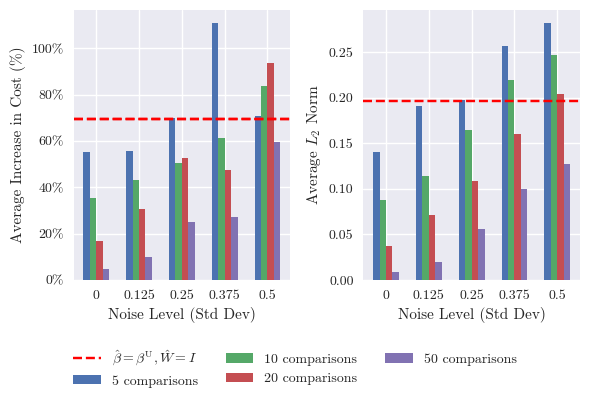

In [83]:
data1 = np.load("results/simpleSCM_comparison_results.npy")
data2 = np.load("results/simpleSCM_comparison_beta_norm.npy")
title = "simple"
# taken from logs
baseline1 = 69.520795622306/100
baseline2 = 0.19625156694386833


metric_plots(data1, data2, title, baseline1, baseline2)